In [3]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

dataset.head()

--2025-04-25 15:28:52--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2025-04-25 15:28:52 (73.7 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# Manipulate sex, smoker, region
dataset["sex"] = dataset["sex"].str.strip().map({"male": 1, "female": 0})
dataset["smoker"] = dataset["smoker"].str.strip().map({"yes": 1, "no": 0})
dataset['region'] = dataset['region'].astype('category').cat.codes

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [6]:
test_dataset = dataset.sample(frac=0.2, random_state=42)
train_dataset = dataset.drop(test_dataset.index)

test_labels = test_dataset.pop("expenses")
train_labels = train_dataset.pop("expenses")

In [7]:
len(test_dataset), len(train_dataset)

(268, 1070)

In [8]:
normalizer = Normalization()
normalizer.adapt(np.array(train_dataset))

model = Sequential([
    normalizer,
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1)
])
model.compile(optimizer="adam", loss="mae", metrics=["mae", "mse"])
model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100


E0000 00:00:1745569740.582305   52320 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745569740.585849   52320 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13291.7939 - mae: 13291.7939 - mse: 313048608.0000 - val_loss: 14001.6777 - val_mae: 14001.6777 - val_mse: 352139552.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13069.2480 - mae: 13069.2480 - mse: 304775904.0000 - val_loss: 13997.1553 - val_mae: 13997.1553 - val_mse: 352008160.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13187.0938 - mae: 13187.0938 - mse: 312543648.0000 - val_loss: 13988.2568 - val_mae: 13988.2568 - val_mse: 351753120.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13406.7783 - mae: 13406.7783 - mse: 324784064.0000 - val_loss: 13972.4531 - val_mae: 13972.4531 - val_mse: 351304128.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13432.8770 - mae: 13432.8770 - mse: 327000384.0000 - val_loss: 13946.9229 - val_mae: 13946.9229 - val_mse: 350583296.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12894.7422 - mae: 12894.7422 - mse: 305634656.00

9/9 - 0s - 3ms/step - loss: 3076.3047 - mae: 3076.3047 - mse: 37232432.0000
Testing set Mean Abs Error: 3076.30 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


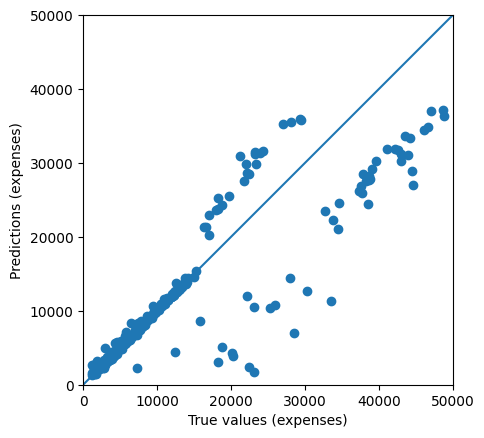

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
